In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,"../") 
from codes.functions.check_policy import load_info
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
import seaborn as sns
import matplotlib.gridspec as gridspec
#matplotlib.use('module://ipykernel.pylab.backend_inline')
from cycler import cycler
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
import matplotlib
from cycler import cycler
from IPython.display import SVG 
import scipy
import pandas as pd



plt.style.use('seaborn') 
fontsize = 12

mpl_settings = {
    'text.usetex': False,
    'font.family': 'sans-serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)

/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u/pori/.local/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/zeropoint/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Figure 1

In [3]:
fig = plt.figure()

x=np.linspace(0,np.pi*28,1000)
N=999
multipliers=[0.3, 3, 3]
#multipliers=[3, 3, 3]

func=np.array([ np.sin(val) if val<x[-1]-2*np.pi else 0 for index, val in enumerate(x)])

colors=["green", "red", "blue"]
offsets=[-4,4,12]
lw=5


for (color, offset, multiplier) in zip(colors, offsets, multipliers):
    plt.plot(offset+multiplier*func, color=color, lw=lw, 
            path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()])
    
    plt.plot([N-50,N],[multiplier*func[N]+2+offset,multiplier*func[N]+offset], color=color, lw=lw, 
            path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()])
    plt.plot([N-50,N],[multiplier*func[N]-2+offset,multiplier*func[N]+offset], color=color, lw=lw, 
            path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()])

#plt.figure(figsize=(8,4))
plt.xlim(0,1000)
plt.ylim(-20,17)
plt.axis('off')
plt.savefig("lightout.pdf", format="pdf", transparent=True)

In [4]:
x=np.linspace(0,np.pi*28,1000)
sigma=200
xmean=14*np.pi



func=np.sin(x)*np.exp(-(x-xmean)**2/(2*sigma))


plt.plot(x,func,lw=3,path_effects=[path_effects.SimpleLineShadow(), 
                           path_effects.Normal()])


#plt.figure(figsize=(8,4))
#plt.xlim(0,1000)
plt.ylim(-3,3)
plt.axis('off')
plt.savefig("envelope.pdf", format="pdf", transparent=True)

In [45]:
fig = plt.figure()
x=np.linspace(-5.5,5.5,1000)
from cycler import cycler


func=x**2


plt.plot(x,func,path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()], color="black", lw=3)

custom_cycler = (cycler(color=['c', 'm', 'y', 'k']))



N=3
sizes=np.random.randint(60,80, size=N)
#plt.gca().set_prop_cycle(custom_cycler)
sizes[N-2]=300
coeff = 7
for i in range(N):
    val=coeff*(i+1)
    
    plt.hlines(val, -np.sqrt(val), np.sqrt(val), lw=3,
               color="red",path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()] )
    #plt.scatter([0], [val], marker='o', s=sizes[i], zorder=20)
    #plt.text(np.sqrt(val)+0.5, val-0.05*val, s=r"$| {} \rangle$".format(i), fontsize=25)
plt.scatter([0], [coeff*(N-2)], marker='o', s=200, zorder=20, color="k")
plt.scatter([0], [coeff*(N-1)], marker='o', s=200, zorder=20, color="k")
plt.arrow(0, coeff+2*N, 0, -N, lw = 5,
             head_width=1, head_length=2, fc='red', ec='red', zorder=50)
    
plt.vlines(0, 23, 30, linestyle="dotted", linewidth=6, color = "black")
#plt.figure(figsize=(8,4))
plt.xlim(-10,10)
#plt.ylim(-3,3)
plt.axis('off')
plt.savefig("levels.pdf", format="pdf", transparent=True)

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(3,1,figsize=(3,3))
N=1000
x=np.linspace(0,1,N)
appo=np.zeros(N)
scale=0.4


    
    
for i in range(3):
    ax=axes[i]
    if i==0:
        ax.plot(x, np.heaviside(x-0.,1)*np.heaviside(-(x-0.4),1)+scale*np.random.randn(N), 
                color='k', lw=3)
    elif i==2:
        ax.plot(x, np.heaviside(x-0.4,1)*np.heaviside(-(x-1),1)+scale*np.random.randn(N), 
                color="black", lw=3)
    else:
        ax.plot(x, appo+scale*np.random.randn(N), 
                color="black", lw=3)
    ax.set_ylim(-1.25,2.5)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([])
    ax.set_yticks([])
    
    

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks

    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # wider figure for demonstration
    

    # get width and height of axes object to compute
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./3.*(ymax-ymin)
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw,
             head_width=hw, head_length=hl, overhang = ohg,
             length_includes_head= True, clip_on = False)

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw,
             head_width=yhw, head_length=yhl, overhang = ohg,
             length_includes_head= True, clip_on = False)

    
    
plt.tight_layout()
plt.savefig("signals.pdf", format="pdf", transparent=True)

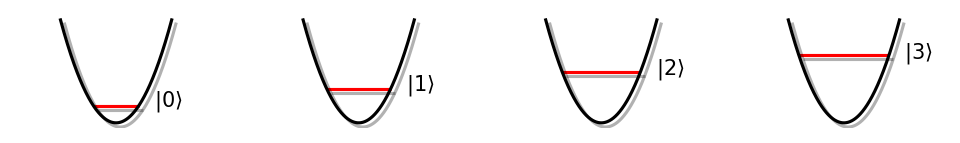

In [8]:
x=np.linspace(-5.5,5.5,1000)
from cycler import cycler
fig, ax = plt.subplots(1, 4, figsize=(8,1))

func=x**2




custom_cycler = (cycler(color=['c', 'm', 'y', 'k']))



N=4
sizes=np.random.randint(60,80, size=N)
#plt.gca().set_prop_cycle(custom_cycler)
sizes[N-2]=300
for i in range(N):
    ax[i].plot(x,func,path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()], color="black")
    val=5*(i+1)
    
    ax[i].hlines(val, -np.sqrt(val), np.sqrt(val), 
               color="red",path_effects=[path_effects.SimpleLineShadow(),
                           path_effects.Normal()] )
    #plt.scatter([0], [val], marker='o', s=sizes[i], zorder=20)
    ax[i].text(np.sqrt(val)+1.5, val-0.05*val, s=r"$| {} \rangle$".format(i), fontsize=10)

    
    #ax[i].vlines(0, 22, 30, linestyle="dotted", linewidth=6)
    #plt.figure(figsize=(8,4))
    ax[i].set_xlim(-10,10)
    #plt.ylim(-3,3)
    ax[i].axis('off')
plt.savefig("levels_diff.pdf", format="pdf", transparent=True)

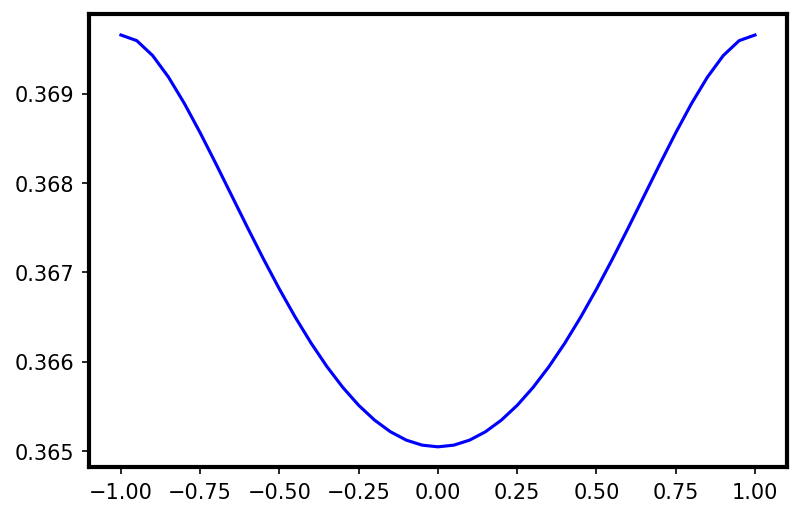

In [47]:
import matplotlib.patches as mpatches
r=2.
yoff=-1
x=np.arange(-1.,1.05,0.05)
y=np.sqrt(r-y**2)+yoff

plt.plot(x,y)
#plt.fill_between(x,y,0)
plt.show()

In [35]:
sc.Figure(10000, 200, 
    sc.Panel(sc.SVG("./light2.svg").scale(0.405).move(36,29)),
    sc.Panel(sc.SVG("envelope.svg"))
    )#.save("compose.svg")
#SVG('compose.svg')

# Figure 2

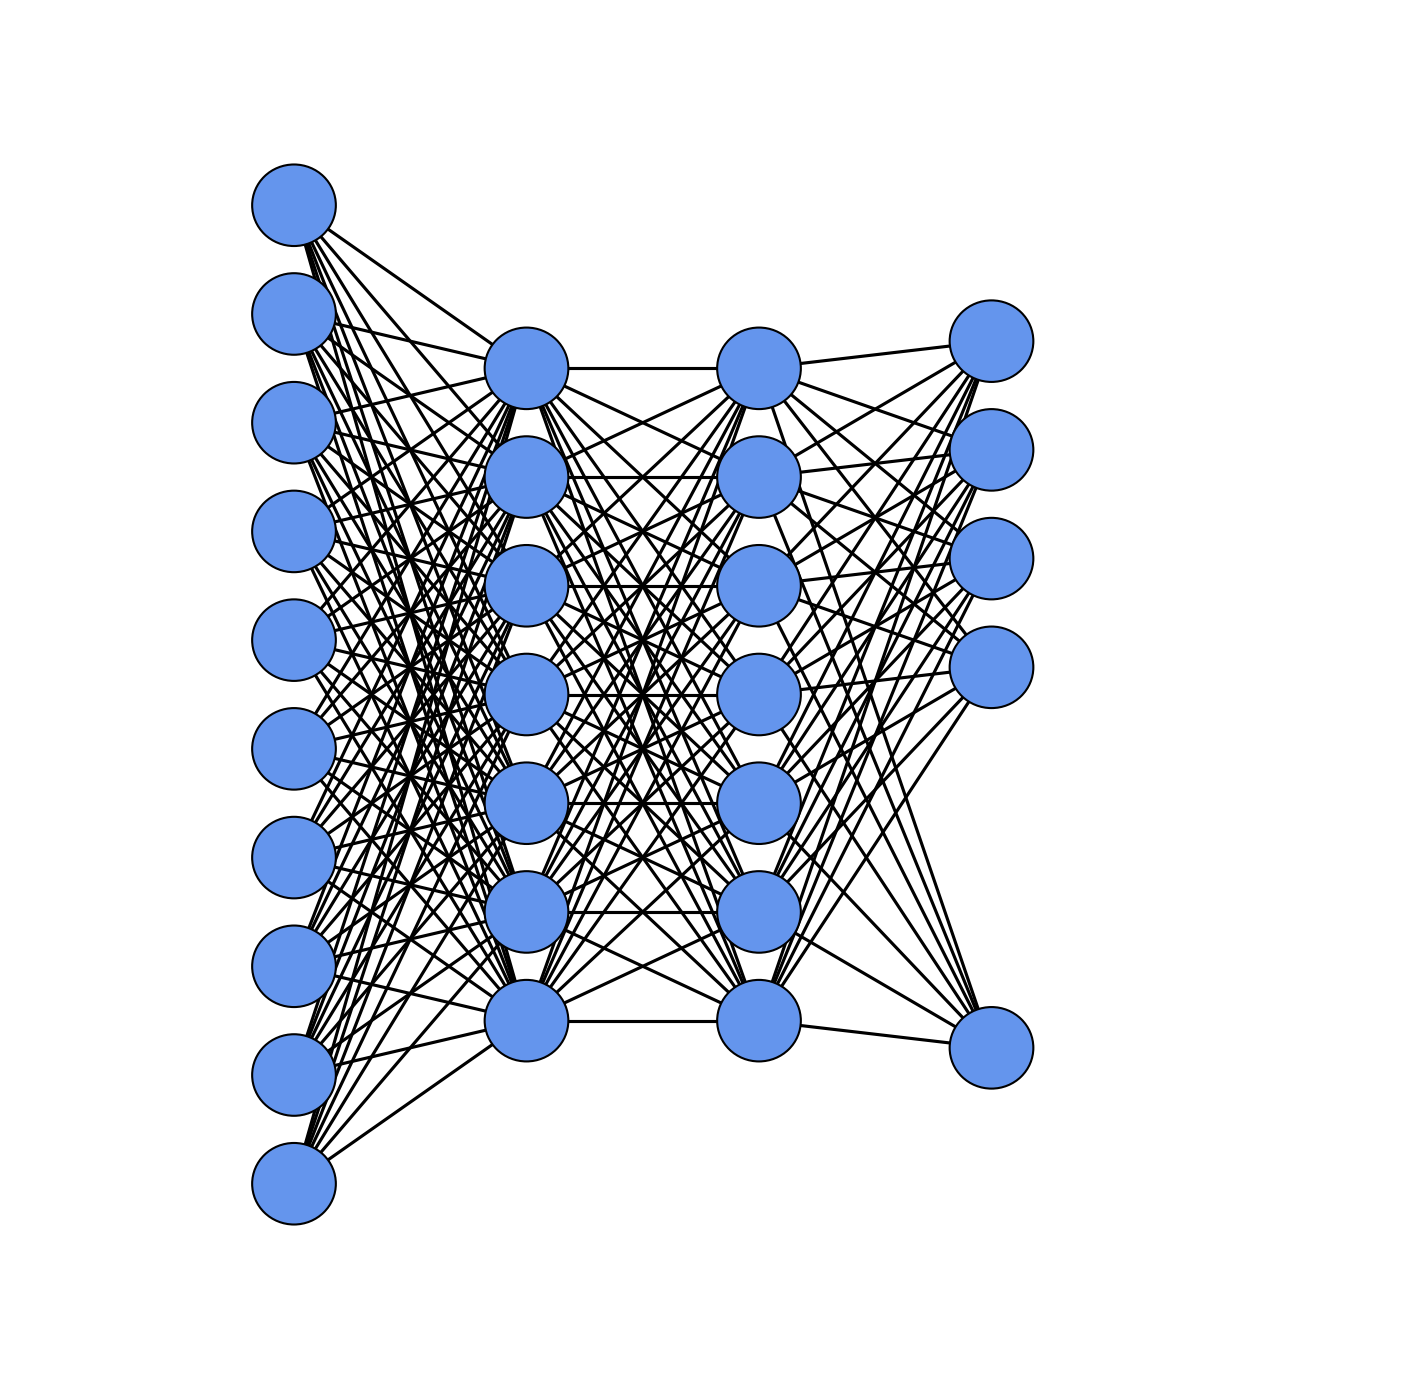

In [9]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    radius=0.03
    color="cornflowerblue"
    # Nodes
    for n, layer_size in enumerate(layer_sizes[:-1]):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius=radius,
                                color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-2], layer_sizes[1:-1])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
            
    offset=0.1
    n, layer_size = len(layer_sizes)-1, layer_sizes[-1]         
    layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.+offset
    for m in range(layer_size-1):
        circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius=radius,
                            color=color, ec='k', zorder=4)
        ax.add_artist(circle)     
            
            
    n, (layer_size_a, layer_size_b) = len(layer_sizes)-2, (layer_sizes[-2], layer_sizes[-1])           
    layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
    layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.+offset
    for m in range(layer_size_a):
        for o in range(layer_size_b-1):
            line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                              [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
            ax.add_artist(line)
            
            
            

    n, layer_size = len(layer_sizes)-1, layer_sizes[-1]         
    circle = plt.Circle((n*h_spacing + left, layer_top - 6.5*v_spacing), radius=radius,
                            color=color, ec='k', zorder=4)
    ax.add_artist(circle)     
            
        
        
    n, (layer_size_a, layer_size_b) = len(layer_sizes)-2, (layer_sizes[-2], layer_sizes[-1])           
    for m in range(layer_size_a):
        line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                          [layer_top_a - m*v_spacing, layer_top_b - 6.5*v_spacing], c='k')
        ax.add_artist(line)
        
        
        
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .2, .7, .1, .9, [10, 7, 7, 5])
fig.savefig('nn.pdf', format="pdf", dpi=300, transparent=True)